# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

# Cas de tests, Modele linéaire

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

In [4]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\debug\rust_lib.dll")

In [5]:
X = np.array([
      [1],
      [2.5]
])
Y = np.array([
      [1],
      [3]
])

X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)

print(X)
print(Y)

[[1. ]
 [2.5]]
[[1.]
 [3.]]


In [6]:
nombre_colonnes_x = 1
nombre_lignex_x = 2
nombre_colonnes_y = 1
nombre_lignes_y = 2
X_flat = X.flatten()
Y_flat = Y.flatten()

In [7]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [8]:
my_lib.find_w_linear_regression.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.find_w_linear_regression.restype = ctypes.POINTER(ctypes.c_float)

In [9]:
find_w_linear_regression_ptr = my_lib.find_w_linear_regression(
    x_to_predict_ptr,
    y_to_predict_ptr,
    nombre_lignex_x,
    nombre_colonnes_x,
    nombre_lignes_y,
    nombre_colonnes_y,
)
find_w_linear_regression = np.ctypeslib.as_array(
    find_w_linear_regression_ptr, ((nombre_colonnes_x*nombre_colonnes_y + 1 ),)
)
print(find_w_linear_regression)

[-0.33333278  1.3333335 ]


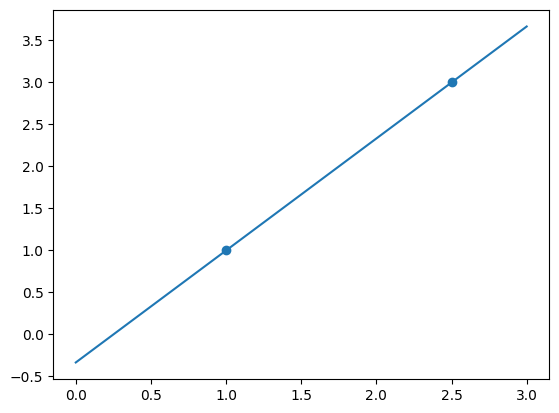

<Figure size 640x480 with 0 Axes>

In [10]:
x = np.linspace(0, 3, 100)

y = find_w_linear_regression[1] * x + find_w_linear_regression[0]

plt.plot(x, y)
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [11]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      [2],
      [3],
      [4]
])

X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)

In [12]:
nombre_colonnes_x = 1
nombre_lignex_x = 3
nombre_colonnes_y = 1
nombre_lignes_y = 3
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)


my_lib.find_w_linear_regression.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.find_w_linear_regression.restype = ctypes.POINTER(ctypes.c_float)
find_w_linear_regression_ptr = my_lib.find_w_linear_regression(
    x_to_predict_ptr,
    y_to_predict_ptr,
    nombre_lignex_x,
    nombre_colonnes_x,
    nombre_lignes_y,
    nombre_colonnes_y,
)
find_w_linear_regression = np.ctypeslib.as_array(
    find_w_linear_regression_ptr, ((nombre_colonnes_x * nombre_colonnes_y + 1),)
)
print(find_w_linear_regression)

[0.9999993 1.       ]


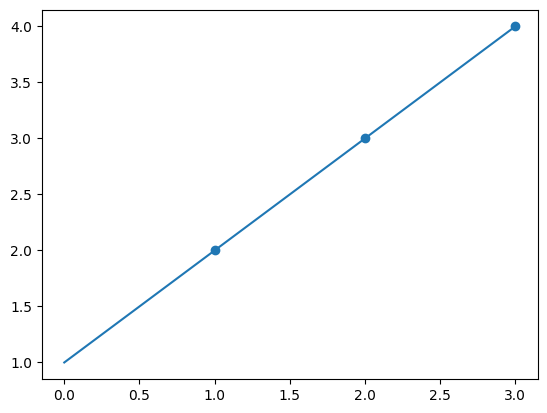

<Figure size 640x480 with 0 Axes>

In [13]:
x = np.linspace(0, 3, 100)

y = find_w_linear_regression[1] * x + find_w_linear_regression[0]

plt.plot(x, y)
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [14]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      [2],
      [3],
      [2.5]
])

Y_line = np.array([2, 3, 2.5])

X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)


In [15]:
nombre_colonnes_x = 2
nombre_lignex_x = 3
nombre_colonnes_y = 1
nombre_lignes_y = 3
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

my_lib.find_w_linear_regression.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.find_w_linear_regression.restype = ctypes.POINTER(ctypes.c_float)
find_w_linear_regression_ptr = my_lib.find_w_linear_regression(
    x_to_predict_ptr,
    y_to_predict_ptr,
    nombre_lignex_x,
    nombre_colonnes_x,
    nombre_lignes_y,
    nombre_colonnes_y,
)
find_w_linear_regression = np.ctypeslib.as_array(
    find_w_linear_regression_ptr, ((nombre_colonnes_x * nombre_colonnes_y + 1),)
)
print(find_w_linear_regression)

[1.   0.25 0.75]


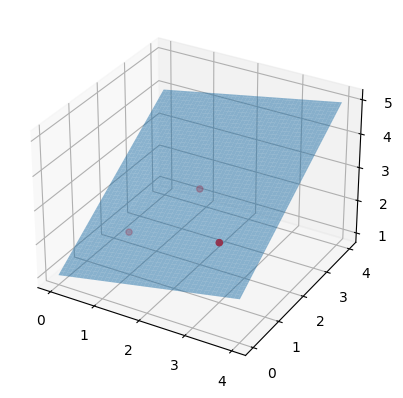

<Figure size 640x480 with 0 Axes>

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
# ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0, 4, 100)
z = np.linspace(0, 4, 100)

X_plan, Z_plan = np.meshgrid(x, z)

Y_plan = find_w_linear_regression[1] * X_plan + find_w_linear_regression[2] * Z_plan + find_w_linear_regression[0]

# plt.plot(x_1, y, x_2)
ax.plot_surface(X_plan,Z_plan,Y_plan, alpha=0.5)
ax.scatter(X[:,0],X[:,1],Y_line,c='r')
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [17]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      [1],
      [2],
      [3]
])

X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)

In [18]:
nombre_colonnes_x = 2
nombre_lignex_x = 3
nombre_colonnes_y = 1
nombre_lignes_y = 3
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

my_lib.find_w_linear_regression.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.find_w_linear_regression.restype = ctypes.POINTER(ctypes.c_float)
find_w_linear_regression_ptr = my_lib.find_w_linear_regression(
    x_to_predict_ptr,
    y_to_predict_ptr,
    nombre_lignex_x,
    nombre_colonnes_x,
    nombre_lignes_y,
    nombre_colonnes_y,
)
find_w_linear_regression = np.ctypeslib.as_array(
    find_w_linear_regression_ptr, ((nombre_colonnes_x * nombre_colonnes_y + 1),)
)
print(find_w_linear_regression)

[0.00392747 0.02822876 0.9685974 ]


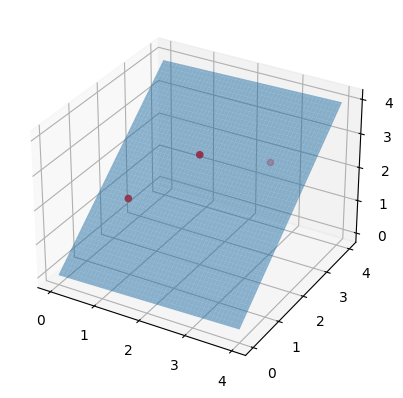

<Figure size 640x480 with 0 Axes>

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
# ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0, 4, 100)
z = np.linspace(0, 4, 100)

X_plan, Z_plan = np.meshgrid(x, z)

Y_plan = find_w_linear_regression[1] * X_plan + find_w_linear_regression[2] * Z_plan + find_w_linear_regression[0]

# plt.plot(x_1, y, x_2)
ax.plot_surface(X_plan,Z_plan,Y_plan, alpha=0.5)
ax.scatter(X[:,0],X[:,1],Y_line,c='r')
plt.show()
plt.clf()

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [21]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      [2],
      [1],
      [-2],
      [-1]
])

X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)


In [22]:
nombre_colonnes_x = 2
nombre_lignex_x = 4
nombre_colonnes_y = 1
nombre_lignes_y = 4
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

my_lib.find_w_linear_regression.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
]
my_lib.find_w_linear_regression.restype = ctypes.POINTER(ctypes.c_float)
find_w_linear_regression_ptr = my_lib.find_w_linear_regression(
    x_to_predict_ptr,
    y_to_predict_ptr,
    nombre_lignex_x,
    nombre_colonnes_x,
    nombre_lignes_y,
    nombre_colonnes_y,
)
find_w_linear_regression = np.ctypeslib.as_array(
    find_w_linear_regression_ptr, ((nombre_colonnes_x * nombre_colonnes_y + 1),)
)
print(find_w_linear_regression)

[ 0.5  0.  -1. ]


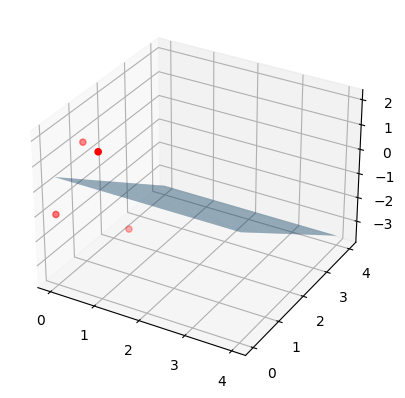

<Figure size 640x480 with 0 Axes>

In [23]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(X[:,0],X[:,1],Y)
# plt.show()
# plt.clf()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
# ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0, 4, 100)
z = np.linspace(0, 4, 100)

X_plan, Z_plan = np.meshgrid(x, z)

Y_plan = find_w_linear_regression[1] * X_plan + find_w_linear_regression[2] * Z_plan + find_w_linear_regression[0]

# plt.plot(x_1, y, x_2)
ax.plot_surface(X_plan,Z_plan,Y_plan, alpha=0.5)
ax.scatter(X[:,0],X[:,1],Y,c='r')
plt.show()
plt.clf()